# Imports
---

https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [36]:
!pip install np_utils # instalar o np_utils

In [40]:
from google.colab import drive
drive.mount('/content/drive') # montando driver para 
%cd "/content/drive/MyDrive/IFES/Disciplinas/2023_02-Inteligencia_artificial/dry-bean-network"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IFES/Disciplinas/2023_02-Inteligencia_artificial/dry-bean-network


In [37]:
import pandas as pd
import pandas as pd
import numpy as np
import np_utils

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Preparando os dados
---

In [39]:
# Carregar os dados
data = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Separar as features (atributos) e as etiquetas (labels)
X = data.drop('Class', axis=1)
Y = data['Class']

# Normalização das features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)  # label enconder
Y_dummy = to_categorical(Y)   # one hot enconder

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y_dummy, test_size=0.2, random_state=42)

In [41]:
# data.head()

x_train.shape
y_train.shape

# Tem problemas. Os números precisam ser tratados, na coluna 'density' por exemplo. Além disso, apesar de ter 10 qualidades, você não tem todas as classes.
# Label encoding pode resolver a questão de classes faltantes, pois ela observa as classes que existem e reclassifica;
# É intessante pensar numa lógica para varrer as colunas em busca de algum erro;

(10888, 7)

# Implementando Rede
---

In [42]:
# Criar um modelo sequencial
classificador = Sequential()

# Adicionar uma camada densa (fully connected) com 16 unidades de ativação ReLU
# e uma entrada de dimensão 784 (número de features após o achatamento)
classificador.add(Dense(units=16, activation='relu', input_dim=16))

# Adicionar uma segunda camada densa com 10 unidades de ativação softmax
# para a classificação das 7 classes no MNIST
classificador.add(Dense(units=7, activation='softmax'))

# Compilar o modelo com o otimizador 'adam', função de perda 'categorical_crossentropy'
# e métrica de avaliação 'categorical_accuracy'
classificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Resumo do modelo, exibindo a arquitetura da rede
classificador.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
history = classificador.fit(x_train, y_train, batch_size = 10, epochs = 100 , verbose = 1, validation_split=0.2)
# X_train, X_test, y_train, y_test
# history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
871/871 [==============================] - 3s 3ms/step - loss: 1.4929 - categorical_accuracy: 0.4121 - val_loss: 1.0334 - val_categorical_accuracy: 0.6327
Epoch 2/100
871/871 [==============================] - 3s 3ms/step - loss: 0.7891 - categorical_accuracy: 0.7831 - val_loss: 0.6128 - val_categorical_accuracy: 0.8466
Epoch 3/100
871/871 [==============================] - 3s 4ms/step - loss: 0.5334 - categorical_accuracy: 0.8689 - val_loss: 0.4627 - val_categorical_accuracy: 0.8756
Epoch 4/100
871/871 [==============================] - 2s 3ms/step - loss: 0.4319 - categorical_accuracy: 0.8789 - val_loss: 0.3973 - val_categorical_accuracy: 0.8760
Epoch 5/100
871/871 [==============================] - 2s 3ms/step - loss: 0.3823 - categorical_accuracy: 0.8811 - val_loss: 0.3610 - val_categorical_accuracy: 0.8852
Epoch 6/100
871/871 [==============================] - 2s 3ms/step - loss: 0.3539 - categorical_accuracy: 0.8846 - val_loss: 0.3387 - val_categorical_accuracy: 0.888

# Validando rede
---

In [44]:
score = classificador.evaluate(x_test, y_test, verbose=1)
print('Test score', score[0])
print('Test accuracy', score[1])

86/86 [==============================] - 0s 2ms/step - loss: 0.2234 - categorical_accuracy: 0.9207
Test score 0.22336506843566895
Test accuracy 0.9206757545471191


In [45]:
resultado = classificador.evaluate(x_test, y_test, verbose=1)
previsoes = classificador.predict(x_test)
previsoes = (previsoes > 0.5)
classe_teste2 = [np.argmax(t) for t in y_test]
previsoes2 = [np.argmax(t) for t in previsoes]

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)

86/86 [==============================] - 0s 3ms/step


In [ ]:
print(x_train)

In [ ]:
print(y_train)

In [48]:
print(matriz)

[[245   0  21   9   6  13   5]
 [  0 117   0   0   0   0   0]
 [  9   0 291   0   3   0   0]
 [  0   0   0 592   4  11  38]
 [  0   0   3   0 389   0   5]
 [  1   0   0   8   0 380   6]
 [  6   0   2  62   6   9 482]]


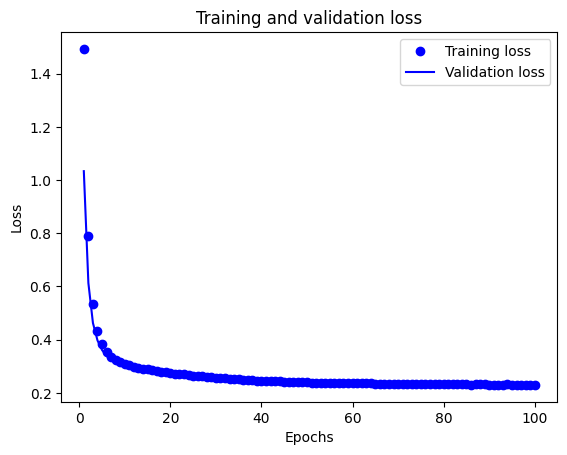

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

#epochs = range(1, len('accuracy') + 1)
epochs = np.arange(1,100 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()